### The purpose of this notebook is to compare recommendation model (DREAM) with and without customer segmentation

##### Author - Reshma

In [ ]:
import pandas as pd
import numpy as np

In [47]:
reco_all = pd.read_csv('results/finall_all_data_result.csv')#all data
reco_c0 = pd.read_csv('results/final_cluster_0_result.csv')#Regular
reco_c1 = pd.read_csv('results/final_cluster_1_result.csv')#Loyal 
reco_c2 = pd.read_csv('results/final_cluster_2_result.csv')#Health Conscious
reco_c3 = pd.read_csv('results/final_cluster_3_result.csv')#Occasional

In [3]:
reco_c0.shape, reco_c1.shape, reco_c2.shape, reco_c3.shape

((72000, 5), (24000, 5), (5250, 5), (58000, 5))

### Hit Ratio of all users without cluster

In [5]:
reco_all['Hit-Ratio-confi'].value_counts()

0.4-0.6    48859
0.6-0.8    33118
0.2-0.4    32967
0.8-1.0    28707
0-0.2      13349
Name: Hit-Ratio-confi, dtype: int64

In [6]:
reco_all['Hit-Ratio-confi'].value_counts(normalize=True)

0.4-0.6    0.311204
0.6-0.8    0.210943
0.2-0.4    0.209981
0.8-1.0    0.182847
0-0.2      0.085025
Name: Hit-Ratio-confi, dtype: float64

### Hit Ratio Clutster0 - Regular

In [8]:
reco_c0 = pd.merge(reco_c0,reco_all[['UserID', 'Hit-Ratio-confi']], on='UserID', how='left')

In [11]:
bar_c0 = pd.merge(reco_c0['confi'].value_counts(normalize=True), reco_c0['Hit-Ratio-confi'].value_counts(normalize=True), left_index=True, right_index=True)

In [13]:
bar_c0 # confi - without cluster, Hit-Ratio-confi - With cluster

,confi,Hit-Ratio-confi
0.4-0.6,0.325235,0.315235
0.2-0.4,0.212413,0.212413
0.6-0.8,0.194300,0.214300
0.8-1.0,0.161184,0.171184
0-0.2,0.106868,0.086868


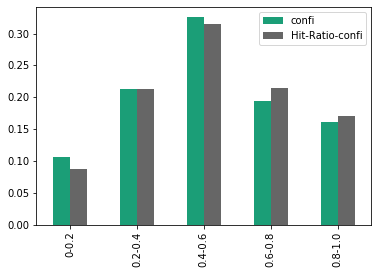

In [14]:
bar_c0['order'] = [3,2,4,5,1]
bar_c0 = bar_c0.sort_values(by='order', ascending=True)
bar_c0.drop('order', axis=1, inplace=True)
bar_c0.plot(kind='bar', colormap='Dark2')

In [15]:
bar_c0['diff'] = bar_c0['Hit-Ratio-confi'] -bar_c0['confi']
bar_c0['diff'][2:].sum()

0.01999958613322972

### Hit Ratio Cluster1 - Loyal

In [16]:
reco_c1= pd.merge(reco_c1,reco_all[['UserID', 'Hit-Ratio-confi']], on='UserID', how='left')

In [19]:
bar_c1 = pd.merge(reco_c1['confi'].value_counts(normalize=True), reco_c1['Hit-Ratio-confi'].value_counts(normalize=True), left_index=True, right_index=True)

In [21]:
bar_c1 # confi - without cluster, Hit-Ratio-confi - With cluster

,confi,Hit-Ratio-confi
0.4-0.6,0.335235,0.340216
0.2-0.4,0.252413,0.221787
0.6-0.8,0.213040,0.211839
0-0.2,0.161184,0.069184
0.8-1.0,0.146868,0.156975


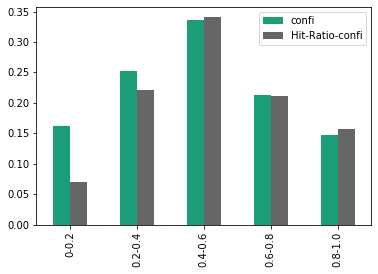

In [22]:
bar_c1['order'] = [3,2,4,1,5]
bar_c1 = bar_c1.sort_values(by='order', ascending=True)
bar_c1.drop('order', axis=1, inplace=True)
bar_c1.plot(kind='bar', colormap='Dark2')

In [23]:
bar_c1['diff'] = bar_c1['Hit-Ratio-confi'] -bar_c1['confi']
bar_c1['diff'][2:].sum()

0.013885847354618452

### Hit Ratio Cluster2 - Health Conscious

In [24]:
reco_c2= pd.merge(reco_c2,reco_all[['UserID', 'Hit-Ratio-confi']], on='UserID', how='left')

In [27]:
bar_c2 = pd.merge(reco_c2['confi'].value_counts(normalize=True), reco_c2['Hit-Ratio-confi'].value_counts(normalize=True), left_index=True, right_index=True)

In [29]:
bar_c2 # confi - without cluster, Hit-Ratio-confi - With cluster

,confi,Hit-Ratio-confi
0-0.2,0.155235,0.074434
0.2-0.4,0.052413,0.110603
0.4-0.6,0.203040,0.198934
0.8-1.0,0.291184,0.426804
0.6-0.8,0.306868,0.189225


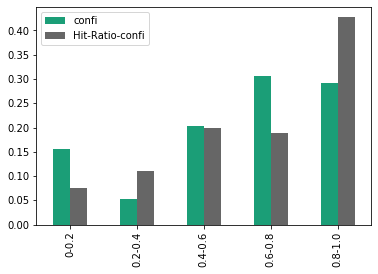

In [30]:
bar_c2['order'] = [1,2,3,5,4]
bar_c2 = bar_c2.sort_values(by='order', ascending=True)
bar_c2.drop('order', axis=1, inplace=True)
bar_c2.plot(kind='bar', colormap='Dark2')

In [31]:
bar_c2['diff'] = bar_c2['Hit-Ratio-confi'] -bar_c2['confi']
bar_c2['diff'][2:].sum()

0.013870878355225602

### Hit Ratio Cluster3 - Occasional

In [32]:
reco_c3= pd.merge(reco_c3,reco_all[['UserID', 'Hit-Ratio-confi']], on='UserID', how='left')

In [35]:
bar_c3 = pd.merge(reco_c3['confi'].value_counts(normalize=True), reco_c3['Hit-Ratio-confi'].value_counts(normalize=True), left_index=True, right_index=True)

In [41]:
bar_c3 # confi - without cluster, Hit-Ratio-confi - With cluster

,confi,Hit-Ratio-confi
0.4-0.6,0.302170,0.304513
0.2-0.4,0.242367,0.210816
0.6-0.8,0.204916,0.207923
0-0.2,0.090269,0.090269
0.8-1.0,0.181012,0.186480


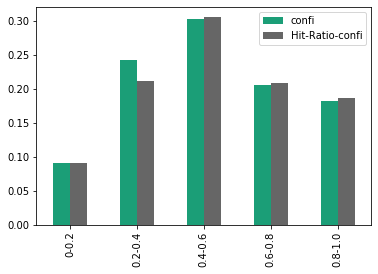

In [42]:
bar_c3['order'] = [3,2,4,1,5]
bar_c3 = bar_c3.sort_values(by='order', ascending=True)
bar_c3.drop('order', axis=1, inplace=True)
bar_c3.plot(kind='bar', colormap='Dark2')

In [43]:
bar_c3['diff'] = bar_c3['Hit-Ratio-confi'] -bar_c3['confi']
bar_c3['diff'][2:].sum()

0.010816915604547034

### Total Improvement across all clusters

In [49]:
bar_c0['diff'][2:].sum()+bar_c1['diff'][2:].sum()+ bar_c2['diff'][2:].sum()+ bar_c3['diff'][2:].sum()

0.05857322744762081

### Total Improvement across targetes clusters

In [51]:
bar_c0['diff'][2:].sum()+ bar_c2['diff'][2:].sum()+ bar_c3['diff'][2:].sum()

0.044687380093002355